# Ontdek exoplaneten

Voordat we kunnen beginnen, moeten we een aantal (software)bibliotheken ('libraries') inladen. Softwarebibliotheken zijn softwarepakketten -- vaak in de vorm van code -- die door anderen geschreven zijn en die je kan herbruiken in je eigen code. Dit document maakt gebruik van de programmeertaal python en softwarebibliotheken die in python geschreven zijn.

We beginnen met het inladen van de [lightkurve](https://docs.lightkurve.org/) bibliotheek. Deze is specifiek ontwikkelt om te interageren met de data die verkregen werd door de Kepler en TESS ruimtemissies.

In [1]:
import lightkurve as lk # We importeren lightkurve en korten het af als lk

Nu kunnen we de data van NASA inladen. We gebruiken hiervoor de `search_targetpixelfile` functie. We geven als argument de naam van de ster (in dit geval `Kepler-1`) waar we willen naar kijken. In python -- en in bijna alle programmeertalen -- wordt tekst opgeslagen als zogenaamde `strings`. Het gaat over een `string of characters` (een sliert van karakters). Strings worden in python gespecifieerd tussen enkele quotes ('Kepler-1') of dubbele quotes ("Kepler-1"). Merk het verschil tussen `10` en `"10"`. Het eerste ziet python als een getal, waarmee je kan rekeken. Het tweede ziet python puur als tekst. Het resultaat van de functie-oproep kennen we toe aan een variabele genaamd `target_pixel_file_kepler_1_search_result`. Bij het programmeren worden variabelen gebruikt om gegevens bij te houden waarop je bewerkingen wilt doen.

In [3]:
target_pixel_file_kepler_1_search_result = lk.search_targetpixelfile("Kepler-1")

We kunnen nu gebruikmaken van de download functie om de echte data in een variabele te krijgen.

In [4]:
target_pixel_file_kepler_1 = target_pixel_file_kepler_1_search_result.download()

/home/jesse/.local/lib/python3.8/site-packages/lightkurve/search.py:228: LightkurveWarning: Warning: 16 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn('Warning: {} files available to download. '


De warning (waarschuwing) vertelt ons dat er 16 mogelijke bestanden zijn om te downloaden. De Missies van NASA hebben in totaal 18 kwartalen geduurd en je kan dus specifiëren voor welke kwartaal je de data wilt downloaden. Je kan ook `download_all` gebruiken om ze allemaal te downloaden. Niet elke ster is in elke kwartiel waargenomen. Voor nu kiezen we voor de data van het derde kwartaal. Dit doen we door het _named-argument_ `quarter` mee te geven aan de functie. We overschrijven de variabele `target_pixel_file_kepler_1`.

In [5]:
target_pixel_file_kepler_1 = lk.search_targetpixelfile("Kepler-1", quarter=3).download()

We kunnen de `plot` methode (een functie op een `target_pixel_file` object) gebruiken om de pixels van de ruimtewaarnemingen te tonen die overeenkomen met de ster.

<AxesSubplot:title={'center':'Target ID: 11446443, Cadence: 7404'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

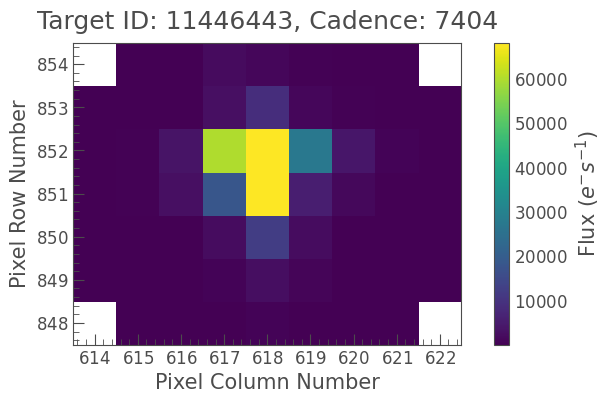

In [12]:
target_pixel_file_kepler_1.plot()

De rode tekst hierboven is een waarschuwing (`warning`) die moet worden opgelost door de `lightkurve` bibliotheek. We kunnen onderstaande import en functie-oproep doen om te zorgen dat deze niet meer getoond worden. Dit zorgt er wel voor dat we geen enkele waarschuwing meer gaan zien.

In [7]:
import warnings; warnings.simplefilter('ignore')

Als we nu de `plot` functie gebruiken, krijgen we geen error.

<AxesSubplot:title={'center':'Target ID: 11446443, Cadence: 7404'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

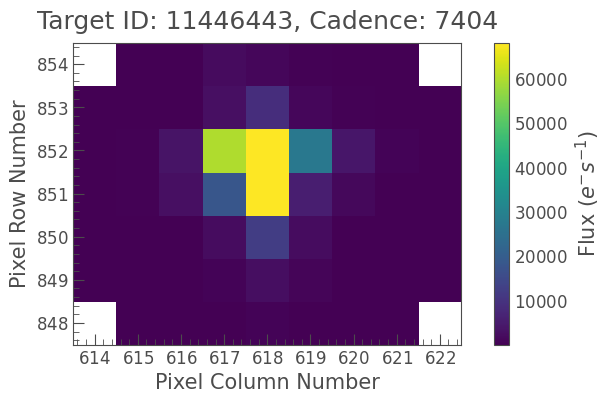

In [14]:
target_pixel_file_kepler_1.plot()

We zien dat we zowel heel grote als heel kleine pixelwaardes hebben, dus kunnen we het beter logaritmisch plotten.

<AxesSubplot:title={'center':'Target ID: 11446443, Cadence: 7404'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

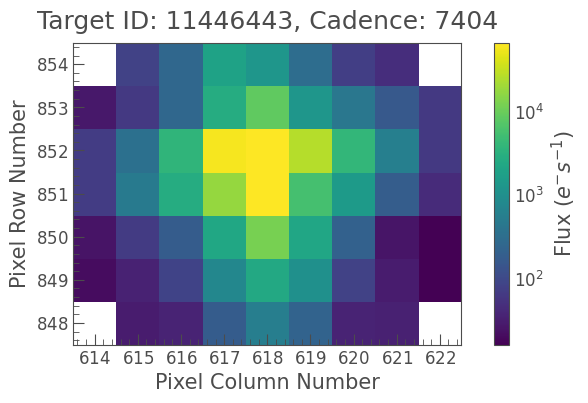

In [11]:
target_pixel_file_kepler_1.plot(scale='log')

Gebruik onderstaand codevak om zelf de `Kepler-8` ster te plotten met data uit kwartiel 10.

In [15]:
# Gebruik dit codevak om de Kepler-8 ster te plotten met data uit kwartiel 10

Als we dit niet zouden willen doen voor meerdere sterren en meerdere kwartielen, dan zouden we deze code moeten kopiëren. Dat is niet erg handig. We kunnen echter zelf ook functies definiëren om zaken te vergemakkelijken.

Bekijk onderstaand voorbeeld van een functie die de som van twee getallen print (naar het scherm) met behulp van de `print` functie.

In [21]:
def print_som(a, b):
    print("De som van", a, "en", b, "is", a + b) # Deze lijn is geïndenteerd: elke lijn in een functie moet geïndenteerd zijn in python
print_som(1,2)
print_som(2,3)

De som van 1 en 2 is 3
De som van 2 en 3 is 5


Gebruik onderstaand codevak om zelf een functie `plot_ster` te definiëren die de data van een bepaalde ster in een bepaald kwartiel download en plot.

In [24]:
# Gebruik dit codevak om de `print_ster` functie te maken.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

We gebruiken de `to_lightcurve` methode om deze data (foto's) om te zetten naar een `lightcurve`. Deze `lightcurve` bevat informatie over de hoeveelheid licht die we opvangen van de ster, doorheen de tijd.

In [26]:
light_curve = target_pixel_file_kepler_1.to_lightcurve(aperture_mask=target_pixel_file_kepler_1.pipeline_mask)

Hieronder plotten we de `lightcurve`. Valt er je iets op?

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

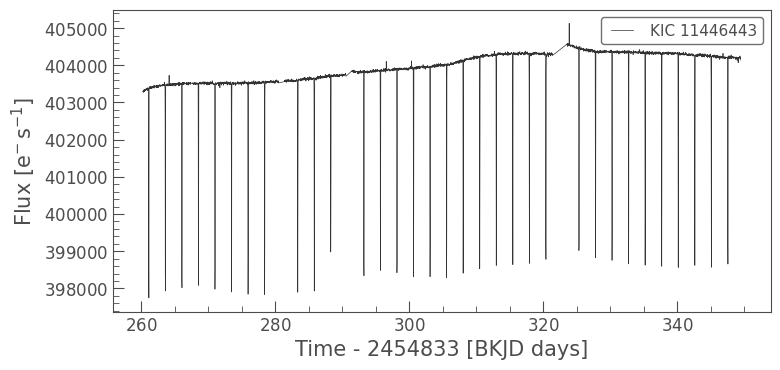

In [28]:
light_curve.plot()

#  Werken met de lightcurves

Bovenstaande grafiek bevat een globaal verloop en mogelijks ook verschijnselen die periodiek terugkomen. Als er een periodieke daling is van de intensiteit, dan kan dit erop wijzen dat er een planeet rond de ster draait. 

Hieronder berekenen we via de `calculate_and_plot_trend` functie de `flattened_lc` en de `trend`. Het plot ook bovenstaande dataapunten opnieuw, met daarbij een rode trendlijn. Deze rode trend is te wijten aan veranderingen in de hoek tussen het invallend licht van de ster en de teloscoop. De `flattened_lc` lightcurve verkrijgen we door de globale trend weg te filteren uit de data en kunnen we beschouwen als 'bruikbare data'.

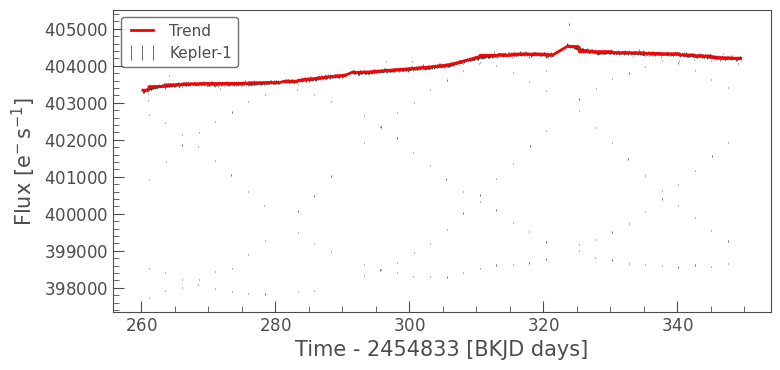

In [30]:
from helper import calculate_and_plot_trend
flattened_lc, trend = calculate_and_plot_trend(light_curve, "Kepler-1")

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

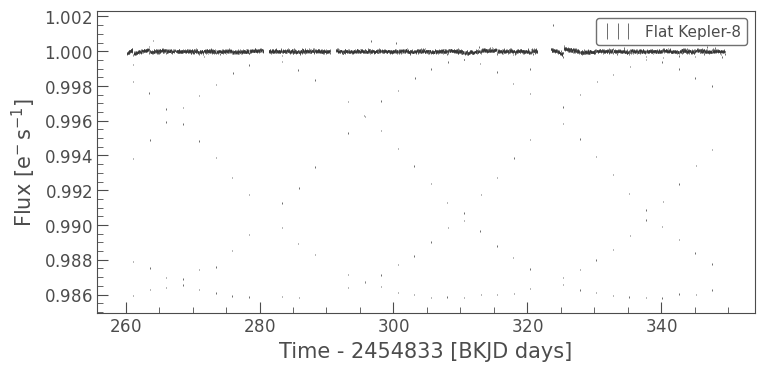

In [31]:
flattened_lc.errorbar(label="Flat " + star)

## Zoek de planeet

Hieronder gaan we een planeet zoeken door de kijken naar het `periodigram`. Dit periodigram toont hoe hard een specifieke periode (of frequentie) voorkomt in een functie.

Voordat we dit periodigram gaan opstellen, moeten we bepalen voor welke periodes we dit willen doen. De meeste missies van Kepler duurde ongeveer 90 dagen, wat is dan de maximale periode die we kunnen waarnemen met deze data?
Stel hieronder de minimale en maximale periode in die je wilt bekijken. Wijzig deze waarden later om specifieke periodes beter te kunnen onderzoeken

In [ ]:
import numpy as np

In [ ]:
min_period = 1
max_period = 15

Hieronder plotten we het periodigram.

In [ ]:
periodogram = flattened_lc.to_periodogram(method="bls", period=np.arange(min_period, max_period, 0.0001))
periodogram.plot();

We kunnen proberen om de periode met de hoogste piek, af te lezen van de bovenstaande grafiek. Dit zal echter niet zo nauwkeurig zijn. Het is daarom handig dat we die gegevens kunnen opvragen aan het periodogram.

In [ ]:
    best_fit_period = periodogram.period_at_max_power
    print('Best fit period: {:.3f}'.format(best_fit_period))
    best_fit_duration = periodogram.duration_at_max_power
    print('Best fit duration: {:.3f}'.format(best_fit_duration))
    best_fit_depth = periodogram.depth_at_max_power
    print('Best fit depth: {:.3f}'.format(best_fit_depth))
    transit_time_at_max_power = periodogram.transit_time_at_max_power
    print('Best fit transit time: {:.3f}'.format(transit_time_at_max_power))


## Hebben we een planeet gevonden?

Hieronder gaan we controleren of de periode die we gevonden hebben, ook echt de data weerspiegeld. Om dit te doen gaan we de grafiek 'samenplooien' (of 'folden' in het engels). Wat betekent dit? Het betekent dat we een bepaald startpunt (de `offset`) gaan kiezen en een bepaalde periode en dat we aan de hand van die twee waardes en de functie, een nieuwe functie gaan maken met een bereik van -0.5 tot 0.5. 

Hoe maken we nu die nieuwe functie?
- We nemen het deel van de eerste functie vanaf het startpunt (de `offset`) tot `offset + periode` en kopiëren dit naar de nieuwe grafiek. We herschuiven (zodat het midden bij x=0 ligt) en schalen dit, zodat het past in het bereik -0.5 tot 0.5
- We delen de delen links en rechts van dit stukje op in stukken met een lengte gelijk aan `periode` en passen hierop deze verschuiving en schaling toe

In [ ]:
fold_period = 3.517
fold_offset = 262.074

Voer het fold commando uit.

In [ ]:
folded = flattened_lc.fold(period=fold_period, t0=fold_offset)

Plot de samengeplooide data via een scatterplot. Hoe zou dit er moeten uitzien voor een planeet?

In [ ]:
folded.bin().scatter()

We kunnen deze samengeplooide functie ook anders plotten, namelijk met een `rivierplot`. Op de y-as staat de cyclus (hoeveelste periodieke herhaling) en op de x as de fase (tussen -0.5 en 0.5). De kleur geeft waar wat de lichtintensiteit is. Hoe zou deze grafiek er moeten uitzien bij een planeet?

In [ ]:
folded.plot_river()